# 서포트 벡터 머신 연습

#####  

서포트 벡터 머신을 공부하고 교재를 따라 와인을 분류하는 classifier 실습을 했었다.

그리고 보스턴 집값을 예측해보는 것을 했는데 사이킷런에서 제공하는 데이터셋으로 해본 결과가 만족스럽지 않았다.

곧 사라질 예정이라고 하는데, 대체 셋으로 Clifornia housing dataset이 있었다.

이를 활용해서 해보려고 한다.

아래쪽에서는 해당 데이터 셋에서 IQR을 이용하여 어느 정도까지 특잇값을 허용할 것인지, 반복문을 이용하여 가장 좋은 n*IQR의 n을 찾는 함수를 만들어 볼 것이다.

# Dataset import
## 데이터 불러오기

이전에 사이킷런에서 안내된 대로 데이터를 불러오기로 한다.

In [1]:
import pandas as pd
import numpy as np

# from sklearn import datasets

from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

shape나 type이 먹히지 않는 상태. 피처 이름들을 살펴본다.

In [2]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [3]:
housing.data.shape

(20640, 8)

In [4]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

# 피처, 타깃 데이터 지정

In [5]:
X = housing.data
y = housing.target

## 트레이닝, 테스트 데이터 분할

In [6]:
from sklearn.model_selection import train_test_split
X_tn, X_te, y_tn, y_te = train_test_split(X, y, random_state = 0)

## 데이터 표준화

In [7]:
from sklearn.preprocessing import StandardScaler

# X 트레이닝 데이터 기준으로 Xtn Xte 를 표준화한다.
std_scale = StandardScaler()
std_scale.fit(X_tn)
X_tn_std = std_scale.transform(X_tn)
X_te_std = std_scale.transform(X_te)

# 서포트 벡터 회귀 모델

## 모델링
### 데이터 학습 (kernel = 'linear')

In [8]:
from sklearn import svm
clf_svr_lr = svm.SVR(kernel = 'linear')               # SVR 메소드를 이용해 분류 문제에 적용. 분류라면 SVC.
clf_svr_lr.fit(X_tn_std, y_tn)

SVR(kernel='linear')

kernel 종류는 SVC와 마찬가지로 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed' 등이 있다.

### 추정계수 및 상수항 확인

결국 선형으로 된 수식을 이용하기 때문에 있을 것이라 생각하여 구해본다.

In [9]:
# 추정계수 확인

print(clf_svr_lr.coef_)

[[ 0.89056714  0.09417056 -0.35703063  0.43554646  0.01645517 -0.80692713
  -0.76967105 -0.75356726]]


In [10]:
# 상수항 확인

print(clf_svr_lr.intercept_)

[1.9481278]


상당히 작은 상수항이다. 뭐 데이터 스케일에 따라 다른 것이긴 하지만

### 데이터 예측

In [11]:
svr_lr_pred = clf_svr_lr.predict(X_te_std)
print(svr_lr_pred)

[1.99326488 2.64035122 1.82543239 ... 2.18160434 2.8665794  2.71869329]


## 평가

### R-square, MSE

regression이기 때문에 r제곱값과 MSE로 모형 평가를 하도록 한다.

r제곱값은 높은 값을 가질수록 좋은 성능을 의미하며, MSE는 작을수록 좋은 성능을 의미한다.

In [12]:
from sklearn.metrics import r2_score

r2 = r2_score(y_te, svr_lr_pred)
print(r2)

-2.5514591714480774


r2는 클수록 좋으며 1에 가까울 수록 좋은 것. 음수도 될 수 있다는 것을 잊으면 안됐다.

`sklearn.metrics.r2_score(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average')`

> R^2 (coefficient of determination) regression score function.

> Best possible score is 1.0 and **it can be negative** (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.



In [13]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_te, svr_lr_pred)
print(mse)

4.694498628934258


mse는 작은 편에 속하지만 데이터 자체에 비해서는 그렇게 작은 값은 아닐지도.

### 예측값 및 실제값 비교

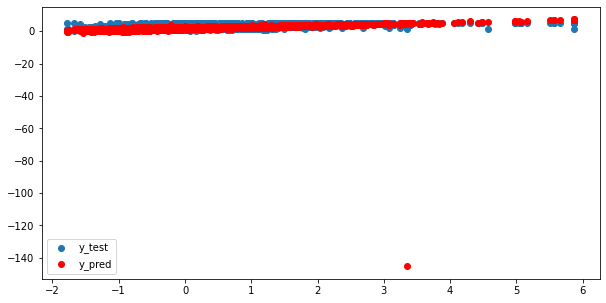

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

#예측값과 실제값의 분포
plt.figure(figsize=(10, 5))                                            #표 크기 지정
plt.scatter(X_te_std[::, 0], y_te, label='y_test')                     #파란점, 실제값
plt.scatter(X_te_std[::, 0], svr_lr_pred, c='r', label='y_pred')       #빨간점, 예측값
plt.legend(loc='best')                           #범례(오른쪽 상단 박스)가 표시되는 위치 지정
plt.show()

한 개의 예측값이 상당히 문제 있어보인다. 무슨 일일까.

In [15]:
svr_lr_pred.min()

-145.3494382311743

어쩌다 이런 값이 나왔을까, 다른 피처들로도 본다.

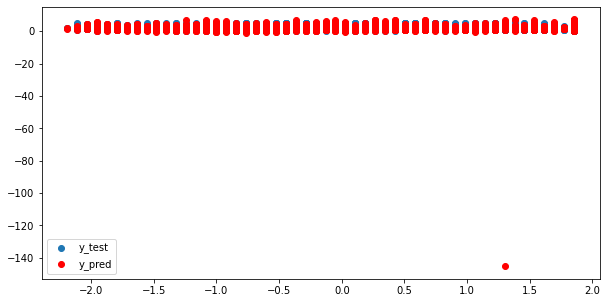

In [16]:
plt.figure(figsize=(10, 5))                                            #표 크기 지정
plt.scatter(X_te_std[::, 1], y_te, label='y_test')                     #파란점, 실제값
plt.scatter(X_te_std[::, 1], svr_lr_pred, c='r', label='y_pred')       #빨간점, 예측값
plt.legend(loc='best')                           #범례(오른쪽 상단 박스)가 표시되는 위치 지정
plt.show()

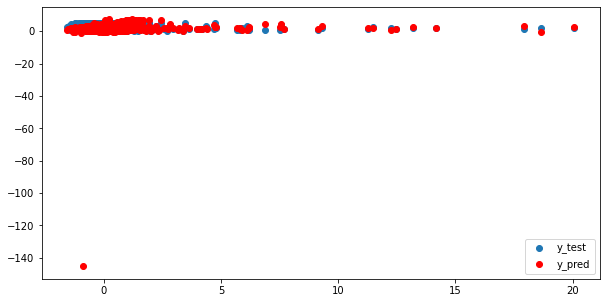

In [17]:
plt.figure(figsize=(10, 5))                                            #표 크기 지정
plt.scatter(X_te_std[::, 2], y_te, label='y_test')                     #파란점, 실제값
plt.scatter(X_te_std[::, 2], svr_lr_pred, c='r', label='y_pred')       #빨간점, 예측값
plt.legend(loc='best')                           #범례(오른쪽 상단 박스)가 표시되는 위치 지정
plt.show()

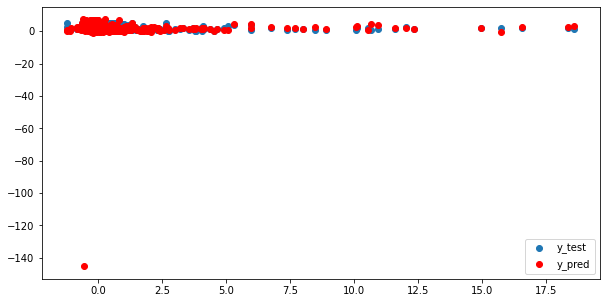

In [18]:
plt.figure(figsize=(10, 5))                                            #표 크기 지정
plt.scatter(X_te_std[::, 3], y_te, label='y_test')                     #파란점, 실제값
plt.scatter(X_te_std[::, 3], svr_lr_pred, c='r', label='y_pred')       #빨간점, 예측값
plt.legend(loc='best')                           #범례(오른쪽 상단 박스)가 표시되는 위치 지정
plt.show()

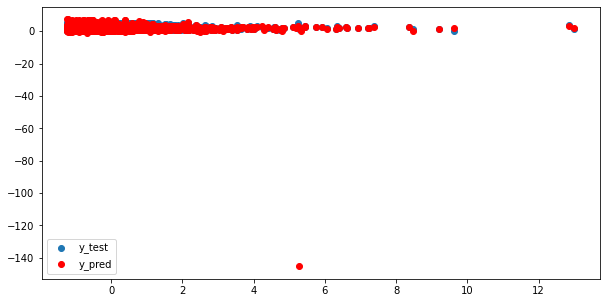

In [19]:
plt.figure(figsize=(10, 5))                                            #표 크기 지정
plt.scatter(X_te_std[::, 4], y_te, label='y_test')                     #파란점, 실제값
plt.scatter(X_te_std[::, 4], svr_lr_pred, c='r', label='y_pred')       #빨간점, 예측값
plt.legend(loc='best')                           #범례(오른쪽 상단 박스)가 표시되는 위치 지정
plt.show()

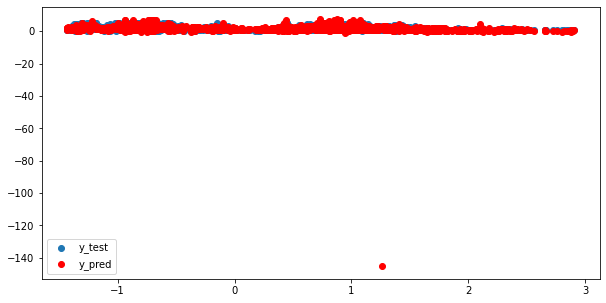

In [20]:
plt.figure(figsize=(10, 5))                                            #표 크기 지정
plt.scatter(X_te_std[::, 6], y_te, label='y_test')                     #파란점, 실제값
plt.scatter(X_te_std[::, 6], svr_lr_pred, c='r', label='y_pred')       #빨간점, 예측값
plt.legend(loc='best')                           #범례(오른쪽 상단 박스)가 표시되는 위치 지정
plt.show()

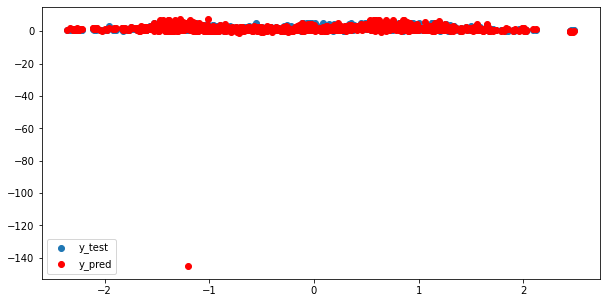

In [21]:
plt.figure(figsize=(10, 5))                                            #표 크기 지정
plt.scatter(X_te_std[::, 7], y_te, label='y_test')                     #파란점, 실제값
plt.scatter(X_te_std[::, 7], svr_lr_pred, c='r', label='y_pred')       #빨간점, 예측값
plt.legend(loc='best')                           #범례(오른쪽 상단 박스)가 표시되는 위치 지정
plt.show()

대체적으로 잘 예측이 된 것 처럼 보이지만 저 값 하나가 크게 흐리고 있다. 

이를 해결하기 위해 데이터프레임으로 바꾸어본다.

# who are you, outlier?

## concat
data와 target을 데이터프레임을 하나로 만들어본다.

In [22]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [23]:
# df의 컬럼이 될 이름

housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [24]:
column_names = housing.feature_names

In [25]:
# array로 되어있던 data를 data frame으로 넣음

df = pd.DataFrame(housing.data, columns=column_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [26]:
df.shape

(20640, 8)

In [27]:
# target 값 또한 데이터 프레임으로 만듦

bin_df = pd.DataFrame(housing.target, columns = ['MedHouseVal'])
bin_df.head()

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [28]:
bin_df.shape

(20640, 1)

In [29]:
all_df = pd.concat(objs = [df, bin_df], axis = 1)
all_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [30]:
all_df.shape

(20640, 9)

## all_df에서 이상치 찾기

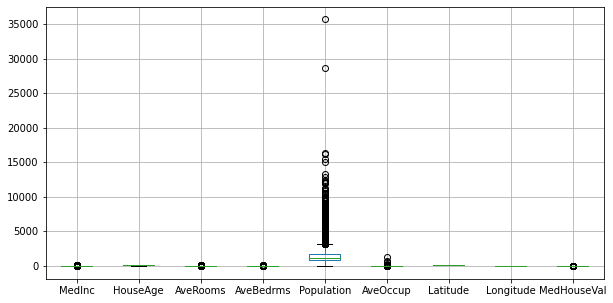

In [31]:
plt.figure(figsize=(10, 5))
all_df.boxplot()
plt.show()

Population에서 일부 크게 분포를 벗어나는 것이 있는 것으로 보여진다. Population외의 것들을 보기로 한다.

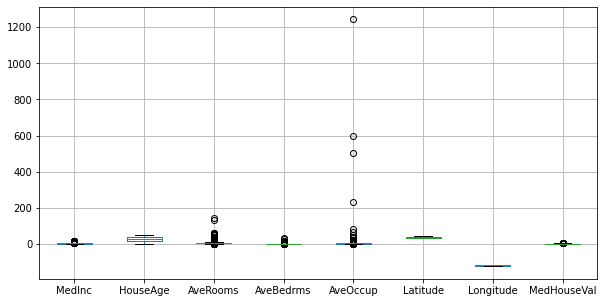

In [32]:
plt.figure(figsize=(10, 5))
all_df.boxplot(column = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'AveOccup', 'Latitude', 'Longitude', 'MedHouseVal'])
plt.show()

사실 예전에는 경도 위도가 무슨 소용이야 했는데, 요즈음에는 군집의 의미로서 의미가 존재한다는 것을 느끼긴 한다. 비슷한 곳에 위치한 것들이 비슷한 경도 위도를 가질 것이기 때문이다.

아니 무튼 그것 말고. AveOccup를 데려와본다.

<AxesSubplot:>

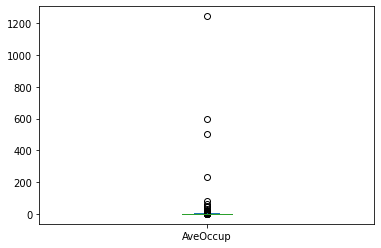

In [33]:
all_df['AveOccup'].plot.box()

<AxesSubplot:>

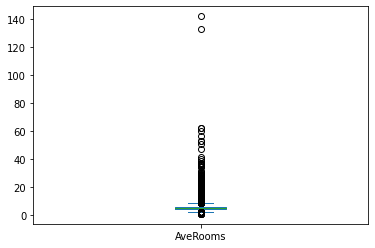

In [34]:
all_df['AveRooms'].plot.box()

정말 일부, 5개 이내의 갯수에서 크게 분포를 벗어나는 것으로 보이는 데이터들이 있는 것으로 보인다.

In [35]:
all_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [36]:
all_df[all_df['AveOccup'] > all_df['AveOccup'].quantile(0.75)]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
58,1.2171,52.0,4.562500,1.121711,1074.0,3.532895,37.82,-122.28,0.803
61,6.1183,49.0,5.869565,1.260870,86.0,3.739130,37.82,-122.29,0.750
67,2.6094,52.0,6.986395,1.659864,492.0,3.346939,37.80,-122.29,0.813
68,1.8516,52.0,6.975610,1.329268,274.0,3.341463,37.81,-122.30,0.850
72,1.7500,49.0,5.552632,1.342105,560.0,3.684211,37.81,-122.29,0.750
...,...,...,...,...,...,...,...,...,...
20608,1.7167,24.0,5.400000,1.273171,768.0,3.746341,39.10,-121.59,0.488
20609,2.3011,18.0,4.856823,1.073826,1527.0,3.416107,39.11,-121.56,0.575
20615,2.3598,23.0,5.461929,1.096447,724.0,3.675127,39.08,-121.54,0.575
20619,2.7303,22.0,6.388514,1.148649,1023.0,3.456081,39.01,-121.56,0.991


In [37]:
quartile_1 = all_df.quantile(0.25)
quartile_3 = all_df.quantile(0.75)
IQR = quartile_3 - quartile_1
condition = (all_df < (quartile_1 - 1.5 * IQR)) | (all_df > (quartile_3 + 1.5 * IQR))
condition = condition.any(axis=1)
search_df = all_df[condition]
# dropped_df = all_df.drop(search_df.index, axis=0)

In [38]:
search_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
41,1.2852,51.0,3.759036,1.248996,517.0,2.076305,37.83,-122.26,1.500
57,0.8172,52.0,6.102459,1.372951,728.0,2.983607,37.82,-122.28,0.853
59,2.5625,2.0,2.771930,0.754386,94.0,1.649123,37.82,-122.29,0.600
...,...,...,...,...,...,...,...,...,...
20608,1.7167,24.0,5.400000,1.273171,768.0,3.746341,39.10,-121.59,0.488
20620,4.5625,40.0,4.125000,0.854167,151.0,3.145833,39.05,-121.48,1.000
20621,2.3661,37.0,7.923567,1.573248,484.0,3.082803,39.01,-121.47,0.775
20629,2.0943,28.0,5.519802,1.020902,6912.0,3.801980,39.12,-121.39,1.083


2만여개에서 벌써 4천여개나 벗어나는 것으로 나타나고 있다. 

이대로는 데이터를 너무 많이 잃어버리지만, 분포를 벗어나는 것들로만 만들었을 때는 정확도가 어느정도 되는지는 보는게 좋을 것이라 생각된다.

# dataset1:  dropped by abnormal range
---

In [39]:
dropped_df = all_df.drop(search_df.index, axis=0)

In [40]:
dropped_df.shape

(16312, 9)

## 모델링 및 예측

In [41]:
# dataset
data = dropped_df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']]
target = dropped_df['MedHouseVal']

In [42]:
# from sklearn import datasets
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split

# from sklearn import svm

# from sklearn.metrics import r2_score, mean_squared_error

# feature, target data select
X = data
y = target

# training data, test data division
X_tn, X_te, y_tn, y_te = train_test_split(X, y, random_state = 0)

# Data standardization for X
std_scale = StandardScaler()
std_scale.fit(X_tn)
X_tn_std = std_scale.transform(X_tn)
X_te_std = std_scale.transform(X_te)

# SVM Regressor Analyzing
clf_svr_lr2 = svm.SVR(kernel = 'linear', epsilon = 0.1)
clf_svr_lr2.fit(X_tn_std, y_tn)

# # w, b(추정계수, 상수항) 출력 : only 'linear'에서만
print('coef: ', clf_svr_lr2.coef_)
print('intercept: ', clf_svr_lr2.intercept_)

# predict y
svr_lr2_pred = clf_svr_lr2.predict(X_te_std)
print('pred: ',svr_lr2_pred)

# r-square score
r2 = r2_score(y_te, svr_lr2_pred)
print('r2 score:', r2)

# MSE
mse = mean_squared_error(y_te, svr_lr2_pred)
print('MSE: ', mse)

coef:  [[ 0.65024432  0.10204182 -0.14249153  0.08926719  0.04747142 -0.1886206
  -0.78734494 -0.74217267]]
intercept:  [1.85859783]
pred:  [2.40520961 1.36700114 2.11587596 ... 2.85808988 2.11262438 0.06751464]
r2 score: 0.6467639049134937
MSE:  0.31434702834484046


r제곱값이 상당히 상승한 것을 볼 수 있으며, MSE 값도 상당히 줄어든 것을 볼 수 있다. 시각적으로 보도록 해본다.

## 시각화

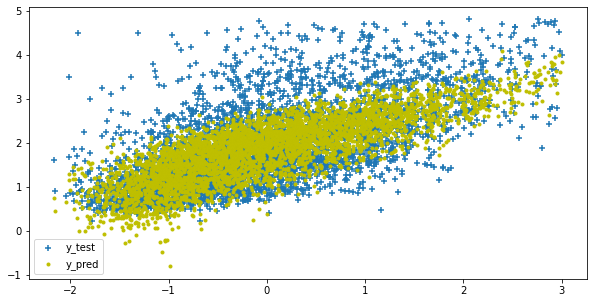

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

#예측값과 실제값의 분포
plt.figure(figsize=(10, 5))                                                           #표 크기 지정
plt.scatter(X_te_std[::, 0], y_te, label='y_test', marker = '+')                      #파란+, 실제값
plt.scatter(X_te_std[::, 0], svr_lr2_pred, c='y', label='y_pred', marker = '.')       #빨간점, 예측값
plt.legend(loc='best')                                     #범례(오른쪽 상단 박스)가 표시되는 위치 지정
plt.show()

어느정도 추정이 잘 된 것으로 보이는데, 

결정계수 R : 0.4759585745906796


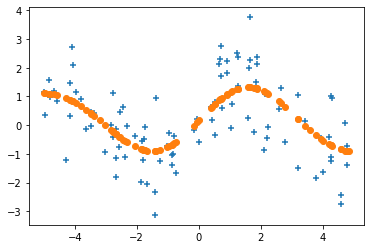

In [44]:
import matplotlib.pyplot as plot
import numpy as np
import math

x = np.random.rand(100,1)
x = x * 10-5

y = np.array([math.sin(i) for i in x])
#평균 0 표준편차 1인 가우시안 정규 분포 
y = y + np.random.randn(100)
#서포트 백터 머신 모듈 가져오기 
from sklearn.svm import SVR
model = SVR()
model.fit(x,y)
relation_square = model.score(x, y)
print('결정계수 R :', relation_square)
y_p = model.predict(x)

plot.scatter(x, y, marker = '+')
plot.scatter(x, y_p, marker = 'o')
plot.show()

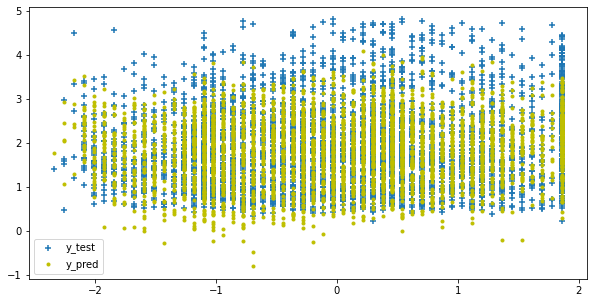

In [45]:
plt.figure(figsize=(10, 5))                                                           #표 크기 지정
plt.scatter(X_te_std[::, 1], y_te, label='y_test', marker = '+')                      #파란+, 실제값
plt.scatter(X_te_std[::, 1], svr_lr2_pred, c='y', label='y_pred', marker = '.')       #빨간점, 예측값
plt.legend(loc='best')                                     #범례(오른쪽 상단 박스)가 표시되는 위치 지정
plt.show()

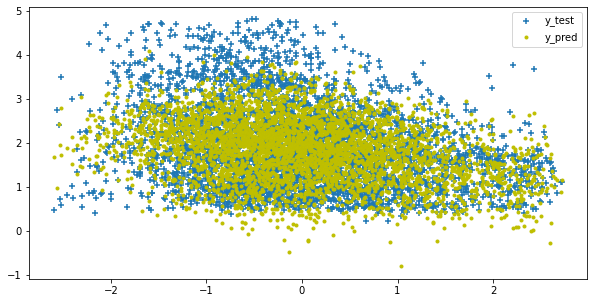

In [46]:
plt.figure(figsize=(10, 5))                                                           #표 크기 지정
plt.scatter(X_te_std[::, 5], y_te, label='y_test', marker = '+')                      #파란+, 실제값
plt.scatter(X_te_std[::, 5], svr_lr2_pred, c='y', label='y_pred', marker = '.')       #빨간점, 예측값
plt.legend(loc='best')                                     #범례(오른쪽 상단 박스)가 표시되는 위치 지정
plt.show()

<AxesSubplot:>

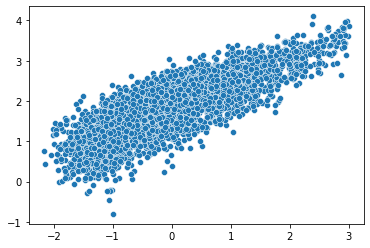

In [47]:
sns.scatterplot(x = X_te_std[::, 0], y = svr_lr2_pred)

결정계수와 상수항으로 그림도 그리고 싶은데 어렵다. 

아무튼 분포를 벗어나는 것들을 제외하기 전보다 상당히 많이 나아진 것을 볼 수 있다. 

이번에는 epsilon을 0.05 로 반을 낮춰본다.

## dataset1: epsilon = 0.05

In [48]:
# dataset
data = dropped_df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']]
target = dropped_df['MedHouseVal']

In [49]:
# from sklearn import datasets
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split

# from sklearn import svm

# from sklearn.metrics import r2_score, mean_squared_error

# feature, target data select
X = data
y = target

# training data, test data division
X_tn, X_te, y_tn, y_te = train_test_split(X, y, random_state = 0)

# Data standardization for X
std_scale = StandardScaler()
std_scale.fit(X_tn)
X_tn_std = std_scale.transform(X_tn)
X_te_std = std_scale.transform(X_te)

# SVM Regressor Analyzing
clf_svr_lr2_ep05 = svm.SVR(kernel = 'linear', epsilon = 0.05)
clf_svr_lr2_ep05.fit(X_tn_std, y_tn)

# # w, b(추정계수, 상수항) 출력 : only 'linear'에서만
print('coef: ', clf_svr_lr2_ep05.coef_)
print('intercept: ', clf_svr_lr2_ep05.intercept_)

# predict y
svr_lr2_ep05_pred = clf_svr_lr2.predict(X_te_std)
print('pred: ',svr_lr2_ep05_pred)

# r-square score
r2 = r2_score(y_te, svr_lr2_ep05_pred)
print('r2 score:', r2)

# MSE
mse = mean_squared_error(y_te, svr_lr2_ep05_pred)
print('MSE: ', mse)

coef:  [[ 0.64672214  0.1013055  -0.13792578  0.08706989  0.04928901 -0.18737972
  -0.7936271  -0.75002269]]
intercept:  [1.85453959]
pred:  [2.40520961 1.36700114 2.11587596 ... 2.85808988 2.11262438 0.06751464]
r2 score: 0.6467639049134937
MSE:  0.31434702834484046


r2 스코어가 그대로 같게, 0.6467639049134937 나왔다. 내가 뭐 잘못했나? 하지만 아니다. (?)

행여 다르다고 하더라도 크게 다를 것이 없을 것으로 보이기도 하는 것이, 이미 어느정도 데이터에 잘 적합 되었음이 그래프에서 보였기 때문이다. 

벗어나는 것들은 어느정도 벗어나는 대로 두어야 un-seen data에 대해서도 강해지지 않을까.

# dataset2: dropped by 10times IQR more than Q1, Q3
---
이번에는 정말 정말 범위를 벗어나는 데이터만 지우는 것으로 해본다.

그렇게 하기 위해서 1.5가 아닌 10으로 늘려본다.

In [50]:
quartile_1 = all_df.quantile(0.25)
quartile_3 = all_df.quantile(0.75)
IQR = quartile_3 - quartile_1
condition2 = (all_df < (quartile_1 - 10 * IQR)) | (all_df > (quartile_3 + 10 * IQR))
condition2 = condition2.any(axis=1)
search_df2 = all_df[condition2]

In [51]:
search_df2.shape

(272, 9)

이를 이용하여 일부를 드랍하기로 한다.

In [52]:
dropped_df2 = all_df.drop(search_df2.index, axis=0)

In [53]:
quartile_1 = all_df.quantile(0.25)
quartile_3 = all_df.quantile(0.75)
IQR = quartile_3 - quartile_1
condition = (all_df < (quartile_1 - 1.5 * IQR)) | (all_df > (quartile_3 + 1.5 * IQR))
condition = condition.any(axis=1)
search_df = all_df[condition]
# dropped_df = all_df.drop(search_df.index, axis=0)

## 모델링 및 예측

In [55]:
# dataset
data = dropped_df2[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']]
target = dropped_df2['MedHouseVal']

In [56]:
# from sklearn import datasets
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split

# from sklearn import svm

# from sklearn.metrics import r2_score, mean_squared_error

# feature, target data select
X = data
y = target

# training data, test data division
X_tn, X_te, y_tn, y_te = train_test_split(X, y, random_state = 0)

# Data standardization for X
std_scale = StandardScaler()
std_scale.fit(X_tn)
X_tn_std = std_scale.transform(X_tn)
X_te_std = std_scale.transform(X_te)

# SVM Regressor Analyzing
clf_svr_lr3 = svm.SVR(kernel = 'linear', epsilon = 0.1)
clf_svr_lr3.fit(X_tn_std, y_tn)

# # w, b(추정계수, 상수항) 출력 : only 'linear'에서만
print('coef: ', clf_svr_lr3.coef_)
print('intercept: ', clf_svr_lr3.intercept_)

# predict y
svr_lr3_pred = clf_svr_lr3.predict(X_te_std)
print('pred: ',svr_lr3_pred)

# r-square score
r2 = r2_score(y_te, svr_lr3_pred)
print('r2 score:', r2)

# MSE
mse = mean_squared_error(y_te, svr_lr3_pred)
print('MSE: ', mse)

coef:  [[ 0.90650883  0.11930397 -0.19006504  0.14593464  0.03414286 -0.20143473
  -0.78077873 -0.7406312 ]]
intercept:  [1.98290184]
pred:  [2.56899628 2.09286506 1.64302466 ... 3.46157514 2.7702787  2.54478829]
r2 score: 0.6548822807713804
MSE:  0.4513356406380503


약 1% 정도의 데이터를 드랍한 것인데, 좋은 결과로 보이지는 않지만 아주 약간, r2 스코어가 향상되었다.  

그러나 MSE는 약간 상승하였다. 그림을 그려보면 크게 분포를 벗어나는 친구가 없을 것으로 예상된다.

## 시각화

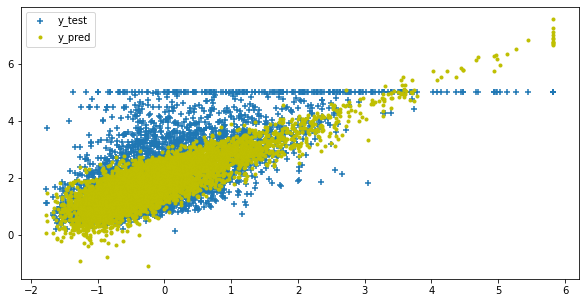

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

#예측값과 실제값의 분포
plt.figure(figsize=(10, 5))                                                           #표 크기 지정
plt.scatter(X_te_std[::, 0], y_te, label='y_test', marker = '+')                      #파란+, 실제값
plt.scatter(X_te_std[::, 0], svr_lr3_pred, c='y', label='y_pred', marker = '.')       #빨간점, 예측값
plt.legend(loc='best')                                     #범례(오른쪽 상단 박스)가 표시되는 위치 지정
plt.show()

아주 끔찍한 것을 보고 있는데, 

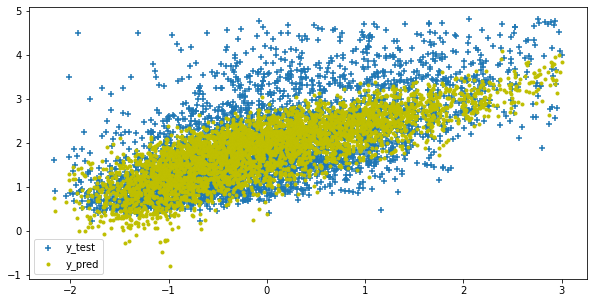

바로전, dropped by abnormal range때의 이것과는 달리 y_test의 모습이 상당히 이상한 것을 볼 수 있다. x값에 따라 변함이 없는 타겟값이 존재하는 것이다. 물론 0번째 피처의 문제일 수 있다.

다른 피처도 본다.

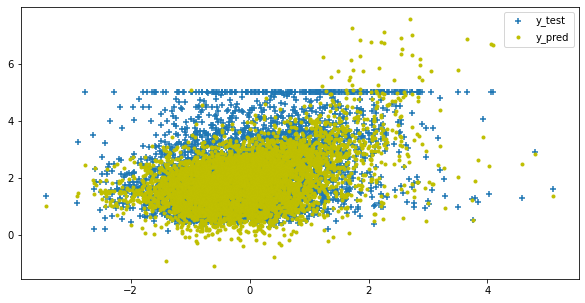

In [58]:
plt.figure(figsize=(10, 5))                                                           #표 크기 지정
plt.scatter(X_te_std[::, 2], y_te, label='y_test', marker = '+')                      #파란+, 실제값
plt.scatter(X_te_std[::, 2], svr_lr3_pred, c='y', label='y_pred', marker = '.')       #빨간점, 예측값
plt.legend(loc='best')                                     #범례(오른쪽 상단 박스)가 표시되는 위치 지정
plt.show()

그도 그런것이, 맨 처음 일부 데이터를 지우기 전, 맨 처음 예측에서는 두번째 피처였던 houseage? 를 제외하고는, 일정한 y값을 갖는 데이터들이 있었다.

그 데이터들이 통째로 분석을 막고있는 것은 아닐까 예상해본다. 

그렇다면, 1.5IQR와 10IQR 사이에, 분명 적절한 선이 있을 것이라는 생각이 든다.

# n $\times$ IQR ? function making

적절한 n값을 찾는 일을 해보도록 하겠다. 함수로 구현한다. 1.5부터 9까지 찾아보도록 한다.

range에서는 0.5 범위가 안되길래 두배수를 하고 /2 를 진행하였다

## 시도1

In [59]:
def nIQR(df, columnslist, targetname):
    for i in range(3, 20, 1):
        quartile_1 = df.quantile(0.25)
        quartile_3 = df.quantile(0.75)
        IQR = quartile_3 - quartile_1
        condition = (df < (quartile_1 - i/2 * IQR)) | (df > (quartile_3 + i/2 * IQR))
        condition = condition.any(axis=1)
        search_df = df[condition]
        dropped_df = df.drop(search_df.index, axis=0)
        
        # dataset
        data = dropped_df[columnslist]
        target = dropped_df[targetname]
        
        # from sklearn import datasets
        # from sklearn.preprocessing import StandardScaler
        # from sklearn.model_selection import train_test_split
        # from sklearn import svm
        # from sklearn.metrics import r2_score, mean_squared_error

        # feature, target data select
        X = data
        y = target

        # training data, test data division
        X_tn, X_te, y_tn, y_te = train_test_split(X, y, random_state = 0)

        # Data standardization for X
        std_scale = StandardScaler()
        std_scale.fit(X_tn)
        X_tn_std = std_scale.transform(X_tn)
        X_te_std = std_scale.transform(X_te)

        # SVM Regressor Analyzing
        clf_svr_lr = svm.SVR(kernel = 'linear', epsilon = 0.1)
        clf_svr_lr.fit(X_tn_std, y_tn)
        
        print('n = ', i/2)

        # # w, b(추정계수, 상수항) 출력 : only 'linear'에서만
        print('coef: ', clf_svr_lr.coef_)
        print('intercept: ', clf_svr_lr.intercept_)

        # predict y
        svr_lr_pred = clf_svr_lr.predict(X_te_std)
        print('pred: ', svr_lr_pred)

        # r-square score
        r2 = r2_score(y_te, svr_lr_pred)
        print('r2 score:', r2)

        # MSE
        mse = mean_squared_error(y_te, svr_lr_pred)
        print('MSE: ', mse)
        
        # save the r2 and mse
        r = {i/2:r2}
        m = {i/2:mse}
        r.append(r2_list)
        m.append(mse_list)
        
        print('===================================================')

In [60]:
# nIQR(all_df, housing.feature_names, housing.target_names)

최대 r2, 최소 mse 를 갖는 n 을 바로 출력하도록... 해보고 있다.

## 시도2


In [61]:
def nIQR(df, columnslist, targetname):
    
    r2_dict = dict()
    mse_dict = dict()
    
    for i in range(3, 20, 1):
        quartile_1 = df.quantile(0.25)
        quartile_3 = df.quantile(0.75)
        IQR = quartile_3 - quartile_1
        condition = (df < (quartile_1 - i/2 * IQR)) | (df > (quartile_3 + i/2 * IQR))
        condition = condition.any(axis=1)
        search_df = df[condition]
        dropped_df = df.drop(search_df.index, axis=0)
        
        # dataset
        data = dropped_df[columnslist]
        target = dropped_df[targetname]
        
        # from sklearn import datasets
        # from sklearn.preprocessing import StandardScaler
        # from sklearn.model_selection import train_test_split
        # from sklearn import svm
        # from sklearn.metrics import r2_score, mean_squared_error

        # feature, target data select
        X = data
        y = target

        # training data, test data division
        X_tn, X_te, y_tn, y_te = train_test_split(X, y, random_state = 0)

        # Data standardization for X
        std_scale = StandardScaler()
        std_scale.fit(X_tn)
        X_tn_std = std_scale.transform(X_tn)
        X_te_std = std_scale.transform(X_te)

        # SVM Regressor Analyzing
        clf_svr_lr = svm.SVR(kernel = 'linear', epsilon = 0.1)
        clf_svr_lr.fit(X_tn_std, y_tn)
        
        print('n = ', i/2)

        # # w, b(추정계수, 상수항) 출력 : only 'linear'에서만
        print('coef: ', clf_svr_lr.coef_)
        print('intercept: ', clf_svr_lr.intercept_)

        # predict y
        svr_lr_pred = clf_svr_lr.predict(X_te_std)
        print('pred: ', svr_lr_pred)

        # r-square score
        r2 = r2_score(y_te, svr_lr_pred)
        print('r2 score:', r2)

        # MSE
        mse = mean_squared_error(y_te, svr_lr_pred)
        print('MSE: ', mse)
        
        # save the r2 and mse
        r2_dict["i/2"] = r2
        mse_dict["i/2"] = mse
#         r = dict('{i}/2' = r2)
#         m = dict('{i}/2' = mse)
#         r2_dict.update(r)
#         mse_dict.update(m)
        
        print('===================================================')
    
    # what 'n' has max r2 and min mse?
    
    max_r2_key = max(r2_dict, key = r2_dict.get)
    max_r2_val = r2_dict[max_r2_key]
    
    min_mse_key = min(mse_dict, key = mse_dict.get)
    min_mse_val = mse_dict[min_mse_key]
    
    print("When Maximum r2, n = {}".format(max_r2_key))
    print("Maximum r2 = {}".format(max_r2_val))
    print("When Minimum MSE, n = {}".format(min_mse_key))
    print("Minimum mse = {}".format(min_mse_val))

In [62]:
# # 오류메세지 지우기
# import warnings
# warnings.filterwarnings(action = 'ignore')

# nIQR(all_df, housing.feature_names, housing.target_names)

아 진짜 너무하네.... 키값으로 가져오려고 했는데.

리스트에 넣고 바로 가져오려고 한 것이 아닌 이유는 

키-밸류이기 때문에 서로 엮여져 있는 형태를 바로 이용할 수 있기 때문이다.

물론 n 까지 리스트로 차례로 순서로 넣은 다음

r2 리스트에서 최대값인 아이의 인덱스를 n리스트에서 검색해서 데려오는 방법도 있다... 하지만 쓰기 싫었다. 딕셔너리가 더 직관적이니까

라고 생각하지만 해답이 있으면 해답이 있는대로 해봐야겠지. 

일단 딕셔너리 추가하는 것에서 완전히 잘못되어버렸다. i/2 그대로 들어가면서 딕셔너리 안에 하나만 들어간것 같다.

다시하자. 기억하자 뭘 틀렸는지.

## 완성

In [63]:
def nIQR(df, columnslist, targetname):
    # from sklearn import datasets
    # from sklearn.preprocessing import StandardScaler
    # from sklearn.model_selection import train_test_split
    # from sklearn import svm
    # from sklearn.metrics import r2_score, mean_squared_error

    r2_dict = dict()
    mse_dict = dict()
    
    for i in range(3, 20, 1):
        quartile_1 = df.quantile(0.25)
        quartile_3 = df.quantile(0.75)
        IQR = quartile_3 - quartile_1
        condition = (df < (quartile_1 - i/2 * IQR)) | (df > (quartile_3 + i/2 * IQR))
        condition = condition.any(axis=1)
        search_df = df[condition]
        dropped_df = df.drop(search_df.index, axis=0)
        
        # dataset
        data = dropped_df[columnslist]
        target = dropped_df[targetname]
        
        # feature, target data select
        X = data
        y = target

        # training data, test data division
        X_tn, X_te, y_tn, y_te = train_test_split(X, y, random_state = 0)

        # Data standardization for X
        std_scale = StandardScaler()
        std_scale.fit(X_tn)
        X_tn_std = std_scale.transform(X_tn)
        X_te_std = std_scale.transform(X_te)

        # SVM Regressor Analyzing
        clf_svr_lr = svm.SVR(kernel = 'linear', epsilon = 0.1)
        clf_svr_lr.fit(X_tn_std, y_tn)
        
        print('n = ', i/2)

        # # w, b(추정계수, 상수항) 출력 : only 'linear'에서만
        print('coef: ', clf_svr_lr.coef_)
        print('intercept: ', clf_svr_lr.intercept_)

        # predict y
        svr_lr_pred = clf_svr_lr.predict(X_te_std)
        print('pred: ', svr_lr_pred)

        # r-square score
        r2 = r2_score(y_te, svr_lr_pred)
        print('r2 score:', r2)

        # MSE
        mse = mean_squared_error(y_te, svr_lr_pred)
        print('MSE: ', mse)
        
        # save the r2 and mse
        r2_dict["{}".format(i/2)] = r2
        mse_dict["{}".format(i/2)] = mse
#         r = dict('{i}/2' = r2)
#         m = dict('{i}/2' = mse)
#         r2_dict.update(r)
#         mse_dict.update(m)
        
        print('===================================================')
    
    # what 'n' has max r2 and min mse?
    
    max_r2_key = max(r2_dict, key = r2_dict.get)
    max_r2_val = r2_dict[max_r2_key]
    
    min_mse_key = min(mse_dict, key = mse_dict.get)
    min_mse_val = mse_dict[min_mse_key]
    
    print("When Maximum r2, n = {}".format(max_r2_key))
    print("Maximum r2 = {}".format(max_r2_val))
    print("When Minimum MSE, n = {}".format(min_mse_key))
    print("Minimum mse = {}".format(min_mse_val))

In [64]:
# 오류메세지 지우기
import warnings
warnings.filterwarnings(action = 'ignore')

nIQR(all_df, housing.feature_names, housing.target_names)

n =  1.5
coef:  [[ 0.65024432  0.10204182 -0.14249153  0.08926719  0.04747142 -0.1886206
  -0.78734494 -0.74217267]]
intercept:  [1.85859783]
pred:  [2.40520961 1.36700114 2.11587596 ... 2.85808988 2.11262438 0.06751464]
r2 score: 0.6467639049134937
MSE:  0.31434702834484046
n =  2.0
coef:  [[ 0.80037946  0.12296933 -0.19169716  0.119537    0.04324826 -0.20660968
  -0.76124775 -0.72037243]]
intercept:  [1.95306121]
pred:  [1.35477116 3.20455944 1.1933646  ... 2.35243452 0.64979352 1.63370873]
r2 score: 0.658866894780818
MSE:  0.4194215649130934
n =  2.5
coef:  [[ 0.84413065  0.13471682 -0.19998972  0.13058517  0.04431053 -0.2106623
  -0.76132348 -0.71987306]]
intercept:  [1.96882464]
pred:  [1.70178029 1.2878088  1.84133752 ... 1.03709496 1.34436782 1.39988764]
r2 score: 0.6516352262371646
MSE:  0.44312463186340156
n =  3.0
coef:  [[ 0.87812789  0.12465677 -0.20015569  0.13198454  0.04265838 -0.19888854
  -0.77379839 -0.73429577]]
intercept:  [1.97996298]
pred:  [0.18379605 2.34211621 

와 됐다 하하ㅏ하하하하하ㅏ하하핳 너무 기뻐요 

```
When Maximum r2, n = 3.5
Maximum r2 = 0.675364517494508
When Minimum MSE, n = 1.5
Minimum mse = 0.31434702834484046
```

우선 오차제곱합을 보면 n이 1.5일때가 다른 때보다 작을 수 밖에 없는 것은 어쩔 수 없는 사실이다. 왜냐하면 n이 커질수록 더 많은 이상 수치를 포함하기 때문이다.

그러나 n이 3.5일때 가장 괜찮은 r2값을 보여준 것은 그 정도가 그래도 모델로 설명할 수 있는 정도 안의 데이터들이 포함되는 정도라는 말에 가깝다.

하지만 사실 r2의 값이 전체적으로 차이가 없다. 유의미한 정도의 차이가 아닌 정도에 가까울 정도로 말이다.

여기서 (내 실력으로)더 이상의 좋은 수치를 내는 것은 불가해보여서, 함수로 만들은 것 까지만 하려 했지만, 

조금 아쉬우니 epsilon을 조금 수정하여, 주어지는 데이터 자체에 좀 더 적합되도록 수정하고 결과를 보도록 하겠다.

얼마나 차이가 나는치 결과들의 r2와 mse의 평균과 분산도 함께 보려고 한다.

# epsilon 0.1 -> 0.05

In [65]:
def nIQR_svr_lr_ep05(df, columnslist, targetname):
    # from sklearn import datasets
    # from sklearn.preprocessing import StandardScaler
    # from sklearn.model_selection import train_test_split
    # from sklearn import svm
    # from sklearn.metrics import r2_score, mean_squared_error

    r2_dict = dict()
    mse_dict = dict()
    
    for i in range(3, 5, 1):
        quartile_1 = df.quantile(0.25)
        quartile_3 = df.quantile(0.75)
        IQR = quartile_3 - quartile_1
        condition = (df < (quartile_1 - i/2 * IQR)) | (df > (quartile_3 + i/2 * IQR))
        condition = condition.any(axis=1)
        search_df = df[condition]
        dropped_df = df.drop(search_df.index, axis=0)
        
        # dataset
        data = dropped_df[columnslist]
        target = dropped_df[targetname]
        
        # feature, target data select
        X = data
        y = target

        # training data, test data division
        X_tn, X_te, y_tn, y_te = train_test_split(X, y, random_state = 0)

        # Data standardization for X
        std_scale = StandardScaler()
        std_scale.fit(X_tn)
        X_tn_std = std_scale.transform(X_tn)
        X_te_std = std_scale.transform(X_te)

        # SVM Regressor Analyzing
        clf_svr_lr = svm.SVR(kernel = 'linear', epsilon = 0.05)
        clf_svr_lr.fit(X_tn_std, y_tn)
        
        print('n = ', i/2)

        # # w, b(추정계수, 상수항) 출력 : only 'linear'에서만
        print('coef: ', clf_svr_lr.coef_)
        print('intercept: ', clf_svr_lr.intercept_)

        # predict y
        svr_lr_pred = clf_svr_lr.predict(X_te_std)
        print('pred: ', svr_lr_pred)

        # r-square score
        r2 = r2_score(y_te, svr_lr_pred)
        print('r2 score:', r2)

        # MSE
        mse = mean_squared_error(y_te, svr_lr_pred)
        print('MSE: ', mse)
        
        # save the r2 and mse
        r2_dict["{}".format(i/2)] = r2
        mse_dict["{}".format(i/2)] = mse
#         r = dict('{i}/2' = r2)
#         m = dict('{i}/2' = mse)
#         r2_dict.update(r)
#         mse_dict.update(m)
        
        print('===================================================')
    
    # what 'n' has max r2 and min mse?
    
    max_r2_key = max(r2_dict, key = r2_dict.get)
    max_r2_val = r2_dict[max_r2_key]
    mean_r2 = np.mean(list(r2_dict.values())) # list로 한번 변환을 해줘야 연산이 가능함
    var_r2 = np.std(list(r2_dict.values()))
    
    min_mse_key = min(mse_dict, key = mse_dict.get)
    min_mse_val = mse_dict[min_mse_key]
    mean_mse = np.mean(list(mse_dict.values())) # list로 한번 변환을 해줘야 연산이 가능함
    var_mse = np.std(list(mse_dict.values()))
    
    print("When Maximum r2, n = {}".format(max_r2_key))
    print("Maximum r2 = {}".format(max_r2_val))
    print("r2 Average r2 = {}".format(mean_r2))
    print("r2 Standard deviation= {}".format(mean_r2))
    print(" ")
    print("When Minimum MSE, n = {}".format(min_mse_key))
    print("Minimum mse = {}".format(min_mse_val))
    print("All MSE Average r2 = {}".format(mean_mse))
    print("All MSE Standard deviation= {}".format(var_mse))

In [66]:
import time

In [67]:
start_time = time.perf_counter()

nIQR_svr_lr_ep05(all_df, housing.feature_names, housing.target_names)
end_time = time.perf_counter()

print(f"time elapsed : {int(round((end_time - start_time) * 1000))}ms")

n =  1.5
coef:  [[ 0.64672214  0.1013055  -0.13792578  0.08706989  0.04928901 -0.18737972
  -0.7936271  -0.75002269]]
intercept:  [1.85453959]
pred:  [2.40714416 1.36326775 2.11623706 ... 2.84471768 2.1103221  0.0652279 ]
r2 score: 0.6460615550715076
MSE:  0.31497205389788513
n =  2.0
coef:  [[ 0.80663229  0.12313394 -0.19782879  0.12082789  0.04242586 -0.20601817
  -0.75360602 -0.71329773]]
intercept:  [1.95233389]
pred:  [1.35608999 3.20655743 1.19114911 ... 2.35240707 0.64855882 1.62929737]
r2 score: 0.6587040345638453
MSE:  0.41962180079175687
When Maximum r2, n = 2.0
Maximum r2 = 0.6587040345638453
r2 Average r2 = 0.6523827948176765
r2 Standard deviation= 0.6523827948176765
 
When Minimum MSE, n = 1.5
Minimum mse = 0.31497205389788513
All MSE Average r2 = 0.367296927344821
All MSE Standard deviation= 0.05232487344693587
time elapsed : 33138ms


epsilon을 반으로 낮추었더니 n이 낮은 것이 r2가 높게 나왔다. 그러나 맥시멈 r2의 값 자체는 Maximum r2 = 0.675364517494508 에서 0.6587040345638453로 낮아졌다.

다수가 분포한 값들에는 좀더 가까워졌을 지 몰라도, 아무래도 이상 값들이 많이 포함된 이 데이터에서는 좋은 결과를 내기 어려웠는지 모르겠다.

epsilon을 좀더 낮춰보도록 하겠다.

# epsilon -> 0.02


In [68]:
def nIQR_svr_lr_ep02(df, columnslist, targetname):
    # from sklearn import datasets
    # from sklearn.preprocessing import StandardScaler
    # from sklearn.model_selection import train_test_split
    # from sklearn import svm
    # from sklearn.metrics import r2_score, mean_squared_error

    r2_dict = dict()
    mse_dict = dict()
    
    for i in range(3, 5, 1):
        quartile_1 = df.quantile(0.25)
        quartile_3 = df.quantile(0.75)
        IQR = quartile_3 - quartile_1
        condition = (df < (quartile_1 - i/2 * IQR)) | (df > (quartile_3 + i/2 * IQR))
        condition = condition.any(axis=1)
        search_df = df[condition]
        dropped_df = df.drop(search_df.index, axis=0)
        
        # dataset
        data = dropped_df[columnslist]
        target = dropped_df[targetname]
        
        # feature, target data select
        X = data
        y = target

        # training data, test data division
        X_tn, X_te, y_tn, y_te = train_test_split(X, y, random_state = 0)

        # Data standardization for X
        std_scale = StandardScaler()
        std_scale.fit(X_tn)
        X_tn_std = std_scale.transform(X_tn)
        X_te_std = std_scale.transform(X_te)

        # SVM Regressor Analyzing
        clf_svr_lr = svm.SVR(kernel = 'linear', epsilon = 0.02)
        clf_svr_lr.fit(X_tn_std, y_tn)
        
        print('n = ', i/2)

        # # w, b(추정계수, 상수항) 출력 : only 'linear'에서만
        print('coef: ', clf_svr_lr.coef_)
        print('intercept: ', clf_svr_lr.intercept_)

        # predict y
        svr_lr_pred = clf_svr_lr.predict(X_te_std)
        print('pred: ', svr_lr_pred)

        # r-square score
        r2 = r2_score(y_te, svr_lr_pred)
        print('r2 score:', r2)

        # MSE
        mse = mean_squared_error(y_te, svr_lr_pred)
        print('MSE: ', mse)
        
        # save the r2 and mse
        r2_dict["{}".format(i/2)] = r2
        mse_dict["{}".format(i/2)] = mse
#         r = dict('{i}/2' = r2)
#         m = dict('{i}/2' = mse)
#         r2_dict.update(r)
#         mse_dict.update(m)
        
        print('===================================================')
    
    # what 'n' has max r2 and min mse?
    
    max_r2_key = max(r2_dict, key = r2_dict.get)
    max_r2_val = r2_dict[max_r2_key]
    mean_r2 = np.mean(list(r2_dict.values())) # list로 한번 변환을 해줘야 연산이 가능함
    var_r2 = np.std(list(r2_dict.values()))
    
    min_mse_key = min(mse_dict, key = mse_dict.get)
    min_mse_val = mse_dict[min_mse_key]
    mean_mse = np.mean(list(mse_dict.values())) # list로 한번 변환을 해줘야 연산이 가능함
    var_mse = np.std(list(mse_dict.values()))
    
    print("When Maximum r2, n = {}".format(max_r2_key))
    print("Maximum r2 = {}".format(max_r2_val))
    print("All r2 Average r2 = {}".format(mean_r2))
    print("All r2 Standard deviation= {}".format(mean_r2))
    print(" ")
    print("When Minimum MSE, n = {}".format(min_mse_key))
    print("Minimum mse = {}".format(min_mse_val))
    print("All MSE Average r2 = {}".format(mean_mse))
    print("All MSE Standard deviation= {}".format(var_mse))

In [69]:
start_time = time.perf_counter()

nIQR_svr_lr_ep02(all_df, housing.feature_names, housing.target_names)
end_time = time.perf_counter()

print(f"time elapsed : {int(round((end_time - start_time) * 1000))}ms")

n =  1.5
coef:  [[ 0.64494278  0.10049872 -0.13909435  0.08621071  0.05038195 -0.18814176
  -0.7946254  -0.75137514]]
intercept:  [1.85211763]
pred:  [2.4028742  1.3606641  2.11471637 ... 2.84175196 2.1123591  0.06629524]
r2 score: 0.6455843753334154
MSE:  0.3153966991556664
n =  2.0
coef:  [[ 0.80579034  0.12152185 -0.19920202  0.11996691  0.04298297 -0.20586829
  -0.75340487 -0.71347728]]
intercept:  [1.95135492]
pred:  [1.3552304  3.20425097 1.18972859 ... 2.35415748 0.65055387 1.62656376]
r2 score: 0.6582556350646664
MSE:  0.42017310588872486
When Maximum r2, n = 2.0
Maximum r2 = 0.6582556350646664
All r2 Average r2 = 0.6519200051990409
All r2 Standard deviation= 0.6519200051990409
 
When Minimum MSE, n = 1.5
Minimum mse = 0.3153966991556664
All MSE Average r2 = 0.36778490252219564
All MSE Standard deviation= 0.05238820336652922
time elapsed : 31974ms


예상대로 낮은 n값이 선택되었지만 결과 자체는 달라지지 않았다.



---

# 느낀점

데이터 전처리와 관련된 부분을 많이 배워야겠다. 

데이터 전처리를 적절한 함수를 데려와서 코딩을 잘 하는 것도 좋지만 통계적으로 맞는지, 데이터에 적합한지, 적정선은 어느 정도인지 그런 것들을 배워가는 것이 필요해보인다.